In [2279]:
# Cell 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.interpolate import make_interp_spline

In [2280]:
# Cell 2: Load the dataset
df = pd.read_csv(r"C:\Users\rimjh\Downloads\car_purchasing.csv",encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [2281]:
# Task 1: View dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [2282]:
# Check the number of rows
print(len(df))

500


In [2283]:
# Check for missing values
print (df.isnull().sum())

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


In [2284]:
# Task 3: Summary statistics
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [2285]:
# Task 4: Rename columns to clean format
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,customer_name,customer_e-mail,country,gender,age,annual_salary,credit_card_debt,net_worth,car_purchase_amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [2286]:
# Task 5: Convert gender (0/1) to categorical
df['gender'] = df['gender'].map({0: 'Female', 1: 'Male'})

In [2287]:
# Task 6: Number of customers by gender
df['gender'].value_counts()

gender
Male      253
Female    247
Name: count, dtype: int64

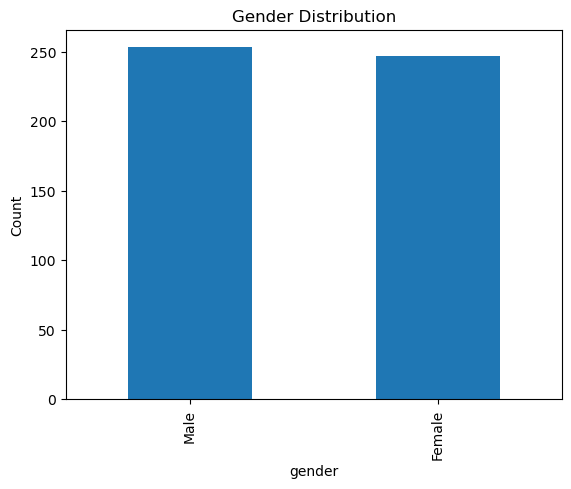

In [2288]:
# Task 7: Plot gender distribution
df['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.ylabel("Count")
plt.show()

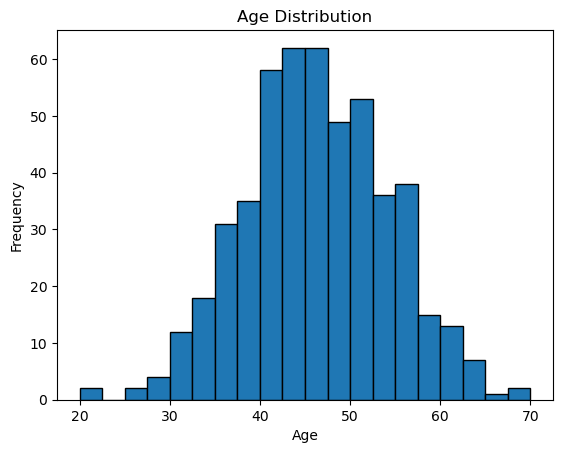

In [2289]:
# Task 8: Age distribution
df['age'].plot(kind='hist', bins=20, edgecolor='black', title='Age Distribution')
plt.xlabel("Age")
plt.show()

In [2290]:
# Task 9: Average purchase amount by gender
df.groupby('gender')['car_purchase_amount'].mean()

gender
Female    44933.131928
Male      43503.620644
Name: car_purchase_amount, dtype: float64

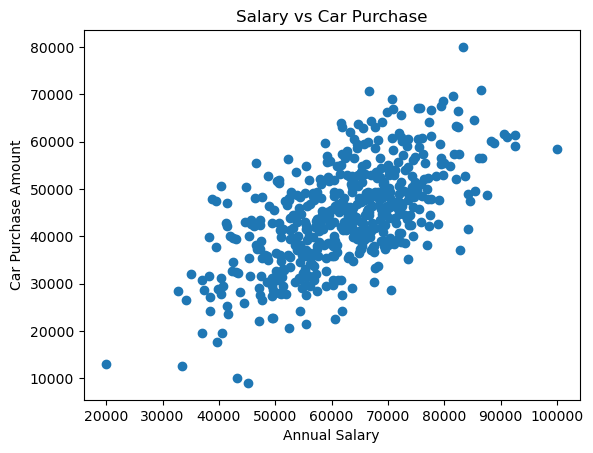

In [2291]:
# Task 10: Scatter plot - Salary vs Car Purchase
plt.scatter(df['annual_salary'], df['car_purchase_amount'])
plt.xlabel("Annual Salary")
plt.ylabel("Car Purchase Amount")
plt.title("Salary vs Car Purchase")
plt.show()

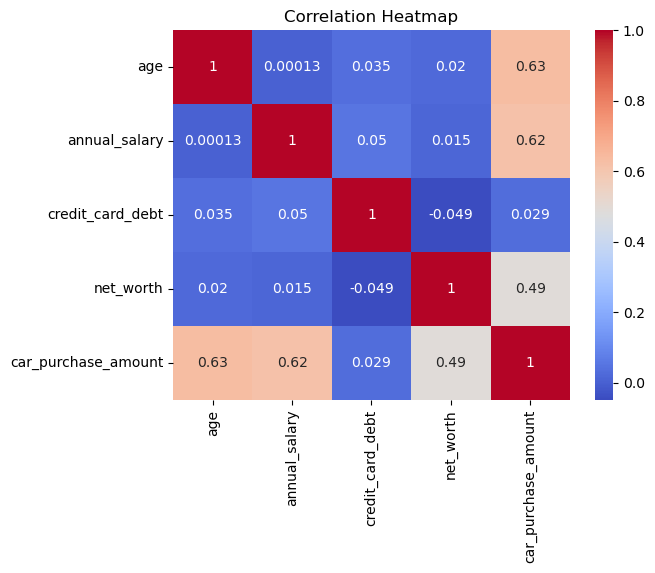

In [2292]:
# Task 11: Correlation heatmap
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [2293]:
# Task 12: Top 5 customers by net worth
df.sort_values(by='net_worth', ascending=False).head(5)[['customer_name', 'net_worth']]

,customer_name,net_worth
315,"Cameron, Kimberley P.",1000000.0000
104,Yasir Tyler,891439.8761
375,"Smith, Nola H.",856287.1522
345,"Burke, Simon H.",854283.5574
45,Quincy Bell,853913.8532


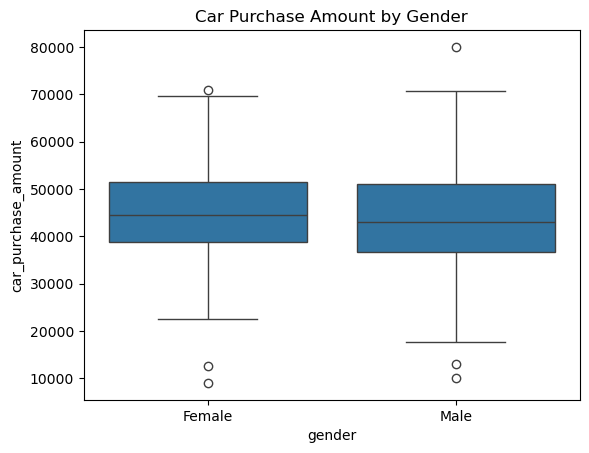

In [2294]:
# Task 13: Boxplot of purchase amount by gender
sns.boxplot(x='gender', y='car_purchase_amount', data=df)
plt.title("Car Purchase Amount by Gender")
plt.show()

In [2295]:
# Task 14: Encode country
le = LabelEncoder()
df['country_encoded'] = le.fit_transform(df['country'])

In [2296]:
# Task 15: Linear Regression Model - Predict Purchase Amount
features = ['age', 'annual_salary', 'credit_card_debt', 'net_worth']
X = df[features]
y = df['car_purchase_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.9999999793157544
MSE: 2.49128118172225


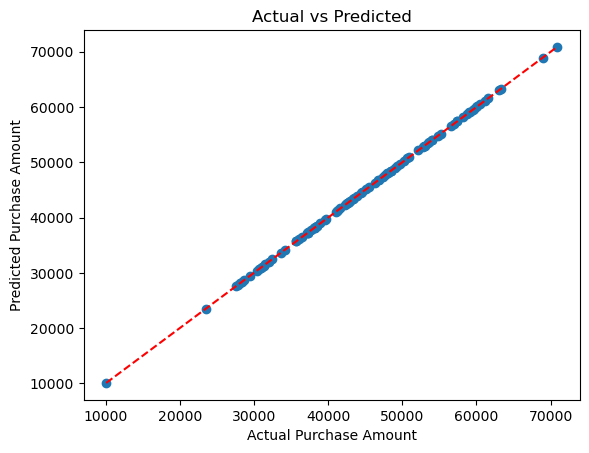

In [2297]:
# Task 16: Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [2298]:
# Task 17: Normalize numeric features
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['annual_salary', 'credit_card_debt', 'net_worth']])
pd.DataFrame(scaled, columns=['salary_scaled', 'debt_scaled', 'worth_scaled']).head()

,salary_scaled,debt_scaled,worth_scaled
0,0.058576,0.574271,-1.110469
1,0.386570,-0.009951,0.573929
2,-0.712361,0.445452,1.193976
3,1.474794,1.382369,0.675595
4,-0.205111,-1.218962,0.743113


In [2299]:
# Task 18: Country-wise average car purchase amount
df.groupby('country')['car_purchase_amount'].mean().sort_values(ascending=False).head()

country
Bonaire, Sint Eustatius and Saba    70878.296640
Nauru                               68678.435200
Cook Islands                        67422.363130
Korea, South                        65583.078025
Ukraine                             61404.225780
Name: car_purchase_amount, dtype: float64

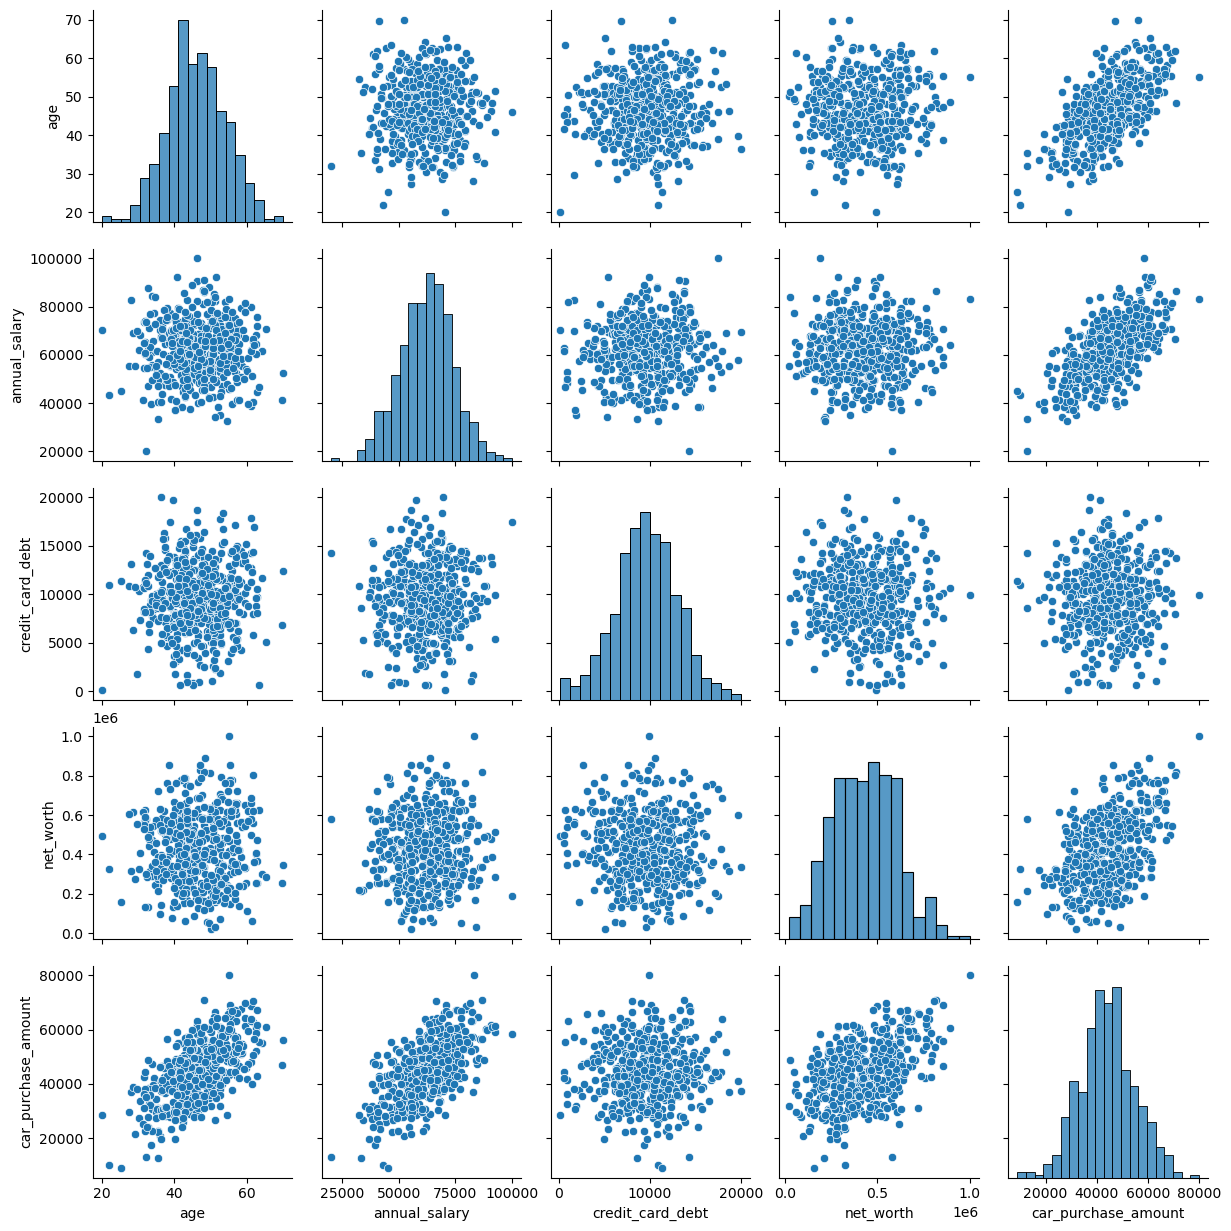

In [2300]:
# Task 20: Pairplot of main numerical features
sns.pairplot(df[['age', 'annual_salary', 'credit_card_debt', 'net_worth', 'car_purchase_amount']])
plt.show()

In [2301]:
# Task 1: Show number of customers per country (top 10)
df['country'].value_counts().head(10)

country
Israel              6
Mauritania          6
Bolivia             6
Greenland           5
Saint Barthélemy    5
Guinea              5
Iraq                5
Samoa               5
Liechtenstein       5
Bhutan              5
Name: count, dtype: int64

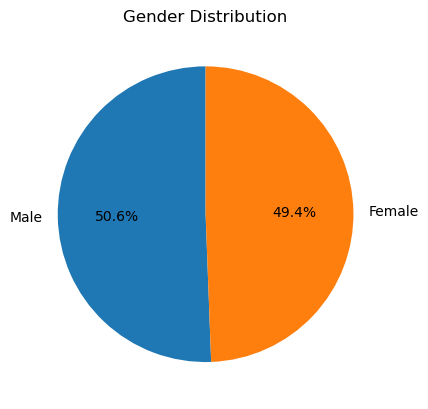

In [2302]:
# Task 2: Pie chart of gender distribution
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

In [2303]:
# Task 3: Maximum and minimum car purchase amounts
print("Max:", df['car_purchase_amount'].max())
print("Min:", df['car_purchase_amount'].min())

Max: 80000.0
Min: 9000.0


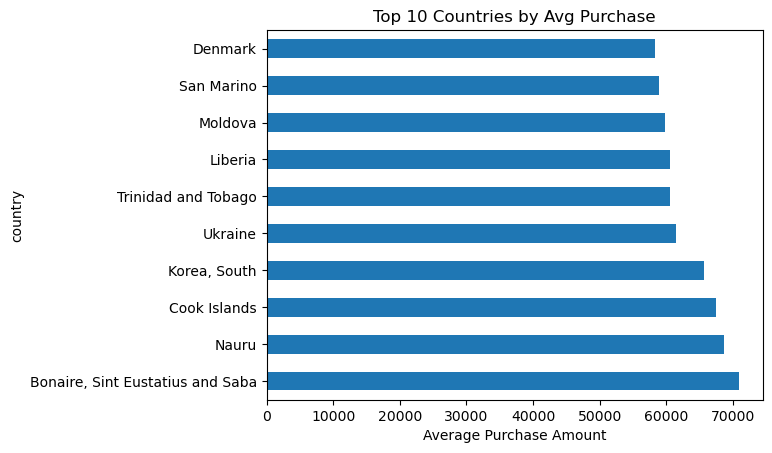

In [2304]:
# Task 4: Mean purchase amount per country (bar plot)
df.groupby('country')['car_purchase_amount'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.xlabel("Average Purchase Amount")
plt.title("Top 10 Countries by Avg Purchase")
plt.show()

In [2305]:
# Task 5: Age groups and count (binning)
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 80], labels=['18–30', '31–40', '41–50', '51–60', '61+'])
df['age_group'].value_counts().sort_index()

age_group
18–30      8
31–40     96
41–50    231
51–60    142
61+       23
Name: count, dtype: int64

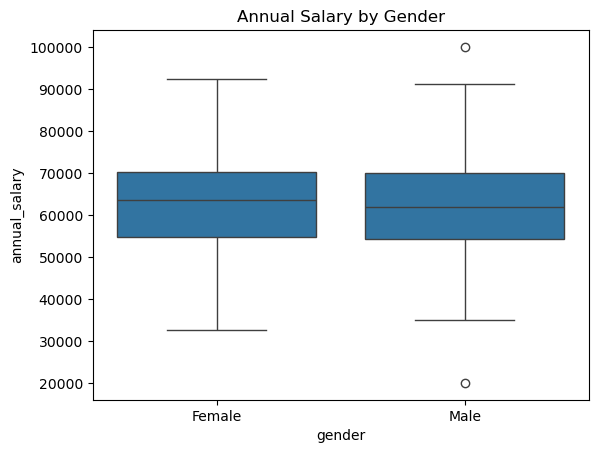

In [2306]:
# Task 6: Boxplot of salary by gender
sns.boxplot(data=df, x='gender', y='annual_salary')
plt.title("Annual Salary by Gender")
plt.show()

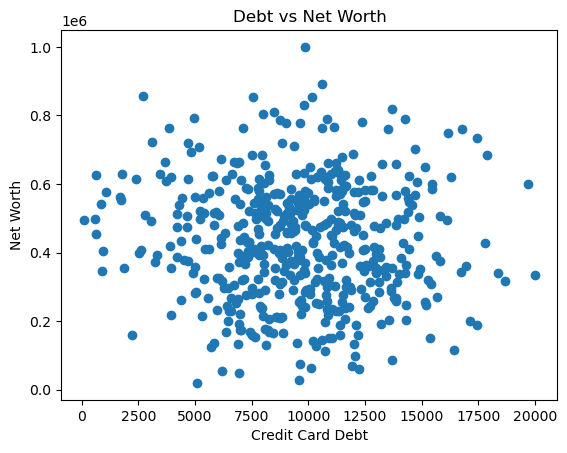

In [2307]:
# Task 7: Compare net worth vs credit card debt (scatter)
plt.scatter(df['credit_card_debt'], df['net_worth'])
plt.xlabel("Credit Card Debt")
plt.ylabel("Net Worth")
plt.title("Debt vs Net Worth")
plt.show()

In [2308]:
# Task 8: Add feature - debt to income ratio
df['debt_to_income_ratio'] = df['credit_card_debt'] / df['annual_salary']
df[['credit_card_debt', 'annual_salary', 'debt_to_income_ratio']].head()

,credit_card_debt,annual_salary,debt_to_income_ratio
0,11609.380910,62812.09301,0.184827
1,9572.957136,66646.89292,0.143637
2,11160.355060,53798.55112,0.207447
3,14426.164850,79370.03798,0.181758
4,5358.712177,59729.15130,0.089717


In [2309]:
# Task 9: Correlation of new feature with purchase amount
df[['debt_to_income_ratio', 'car_purchase_amount']].corr()

,debt_to_income_ratio,car_purchase_amount
debt_to_income_ratio,1.000000,-0.284612
car_purchase_amount,-0.284612,1.000000


C:\Users\rimjh\AppData\Local\Temp\ipykernel_7700\3263384296.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['car_purchase_amount'].mean().plot(kind='bar')


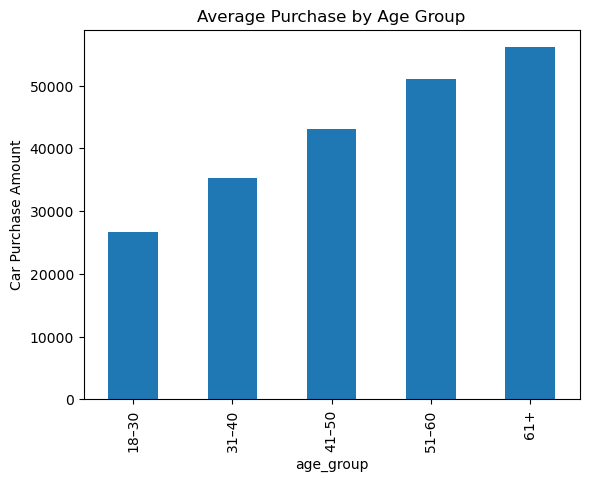

In [2310]:
# Task 10: Compare average purchase by age group
df.groupby('age_group')['car_purchase_amount'].mean().plot(kind='bar')
plt.title("Average Purchase by Age Group")
plt.ylabel("Car Purchase Amount")
plt.show()

In [2311]:
# Task 11: Create "high spender" label (purchase > 50000)
df['high_spender'] = df['car_purchase_amount'] > 50000
df['high_spender'].value_counts()

high_spender
False    363
True     137
Name: count, dtype: int64

In [2312]:
# Task 12: Country with highest % of high spenders
high_spender_ratio = df.groupby('country')['high_spender'].mean().sort_values(ascending=False)
high_spender_ratio.head()

country
Denmark                             1.0
San Marino                          1.0
Niger                               1.0
Bonaire, Sint Eustatius and Saba    1.0
Cambodia                            1.0
Name: high_spender, dtype: float64

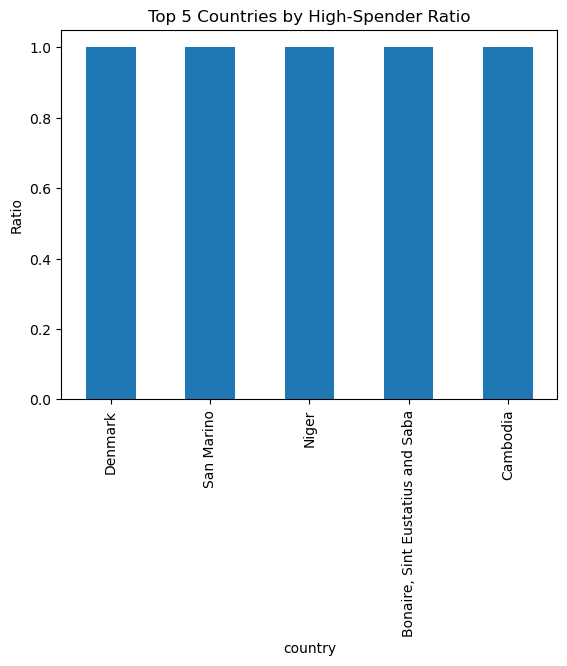

In [2313]:
# Task 13: Plot high spenders by country (top 5)
high_spender_ratio.head(5).plot(kind='bar')
plt.title("Top 5 Countries by High-Spender Ratio")
plt.ylabel("Ratio")
plt.show()

C:\Users\rimjh\AppData\Local\Temp\ipykernel_7700\3589787359.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['gender', 'age_group'])['car_purchase_amount'].mean().unstack().plot(kind='bar')


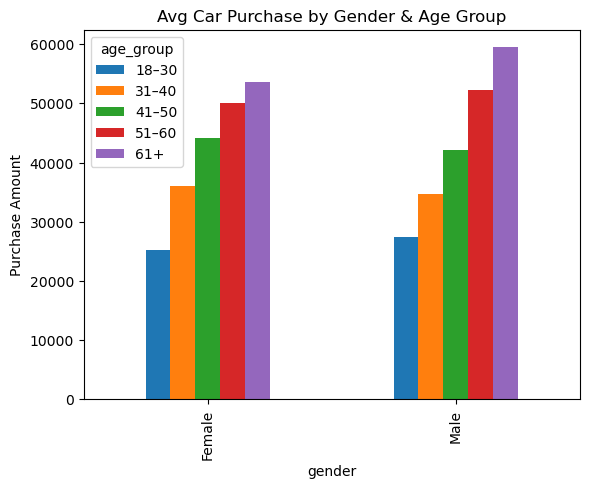

In [2314]:
# Task 14: Group by gender and age group for average purchase
df.groupby(['gender', 'age_group'])['car_purchase_amount'].mean().unstack().plot(kind='bar')
plt.title("Avg Car Purchase by Gender & Age Group")
plt.ylabel("Purchase Amount")
plt.show()

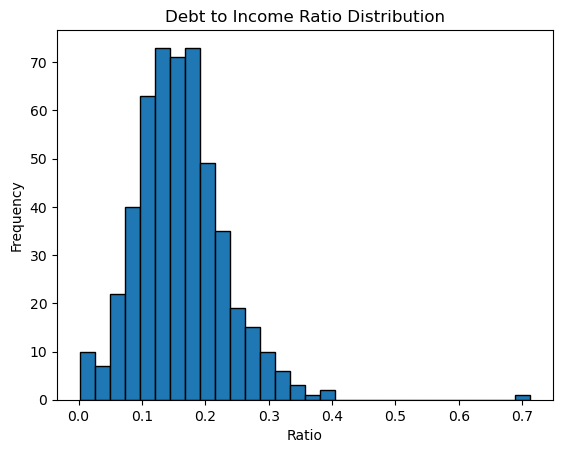

In [2315]:
# Task 16: Histogram of debt to income ratio
df['debt_to_income_ratio'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Debt to Income Ratio Distribution")
plt.xlabel("Ratio")
plt.show()

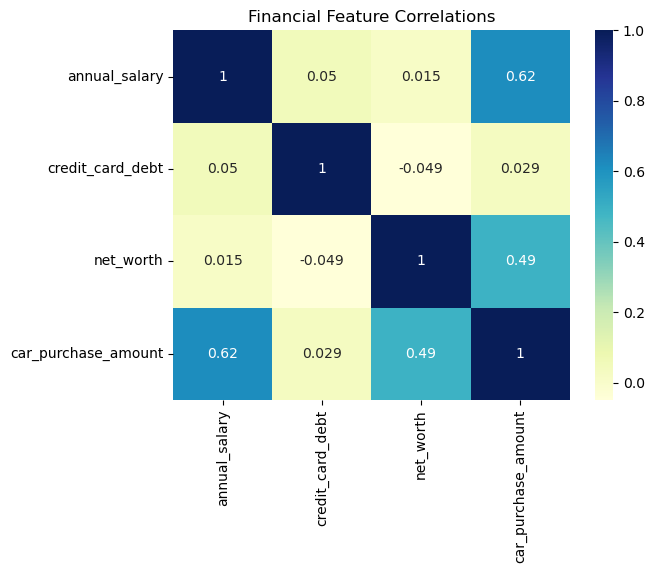

In [2316]:
# Task 18: Correlation matrix of financial features
sns.heatmap(df[['annual_salary', 'credit_card_debt', 'net_worth', 'car_purchase_amount']].corr(), annot=True, cmap='YlGnBu')
plt.title("Financial Feature Correlations")
plt.show()

In [2317]:
# Task 20: Percentage of customers with debt > net worth
ratio = (df['credit_card_debt'] > df['net_worth']).mean() * 100
print(f"{ratio:.2f}% of customers have more credit card debt than net worth.")

0.00% of customers have more credit card debt than net worth.


In [2318]:
# Task 1: How many unique email domains exist?
df['email_domain'] = df['customer_e-mail'].str.split('@').str[1]
df['email_domain'].nunique()

482

In [2319]:
# Task 2: Top 5 email domains
df['email_domain'].value_counts().head(5)

email_domain
ut.org                 3
orci.com               2
Aliquamfringilla.ca    2
amet.org               2
nisl.net               2
Name: count, dtype: int64

In [2320]:
# Task 3: Create income buckets
df['income_group'] = pd.cut(df['annual_salary'], bins=[0, 50000, 100000, 150000, 200000], labels=['Low', 'Mid', 'High', 'Very High'])
df['income_group'].value_counts()

income_group
Mid          425
Low           75
High           0
Very High      0
Name: count, dtype: int64

In [2321]:
# Task 4: Average purchase amount per income group
df.groupby('income_group')['car_purchase_amount'].mean()

C:\Users\rimjh\AppData\Local\Temp\ipykernel_7700\274076729.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('income_group')['car_purchase_amount'].mean()


income_group
Low          33792.424532
Mid          46048.159457
High                  NaN
Very High             NaN
Name: car_purchase_amount, dtype: float64

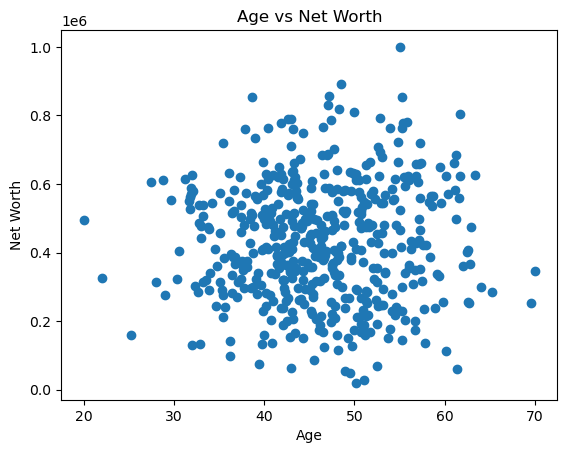

In [2322]:
# Task 5: Age vs Net Worth scatter
plt.scatter(df['age'], df['net_worth'])
plt.title("Age vs Net Worth")
plt.xlabel("Age")
plt.ylabel("Net Worth")
plt.show()

In [2323]:
# Task 6: Detect outliers using IQR for car purchase
Q1 = df['car_purchase_amount'].quantile(0.25)
Q3 = df['car_purchase_amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['car_purchase_amount'] < Q1 - 1.5*IQR) | (df['car_purchase_amount'] > Q3 + 1.5*IQR)]
outliers.shape[0]

5

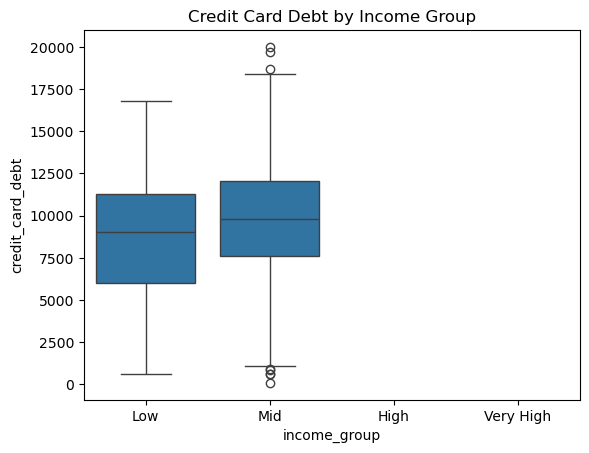

In [2324]:
# Task 7: Boxplot of credit card debt by income group
sns.boxplot(x='income_group', y='credit_card_debt', data=df)
plt.title("Credit Card Debt by Income Group")
plt.show()

In [2325]:
# Task 8: Debt-to-Net Worth ratio feature
df['debt_to_networth'] = df['credit_card_debt'] / df['net_worth']
df[['credit_card_debt', 'net_worth', 'debt_to_networth']].head()

,credit_card_debt,net_worth,debt_to_networth
0,11609.380910,238961.2505,0.048583
1,9572.957136,530973.9078,0.018029
2,11160.355060,638467.1773,0.017480
3,14426.164850,548599.0524,0.026296
4,5358.712177,560304.0671,0.009564


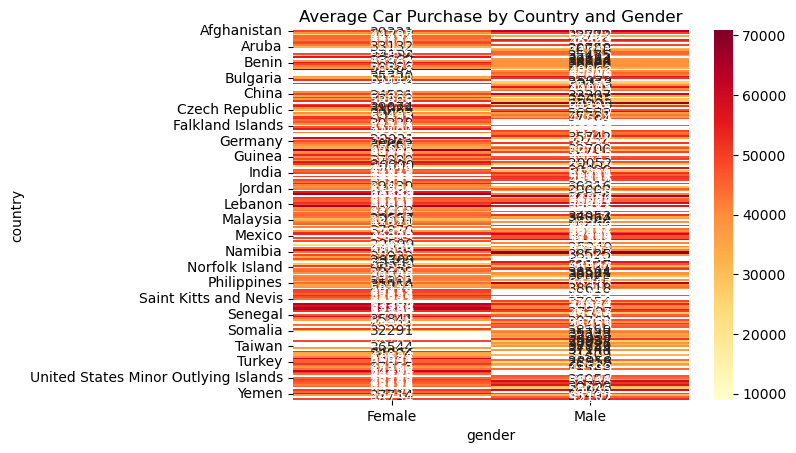

In [2326]:
# Task 17: Heatmap of average purchase per country & gender
pivot = df.pivot_table(values='car_purchase_amount', index='country', columns='gender', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title("Average Car Purchase by Country and Gender")
plt.show()

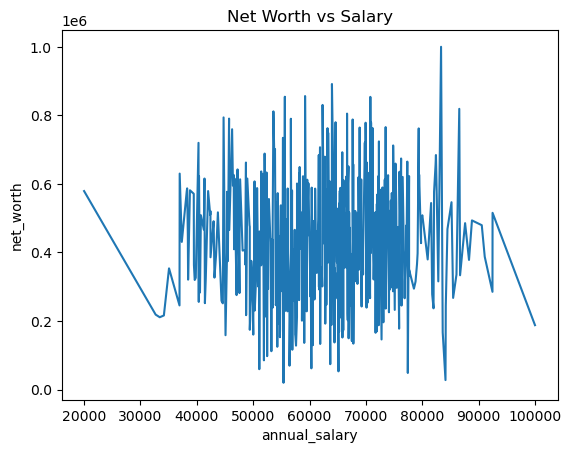

In [2327]:
# Task 18: Relationship between Net Worth and Salary (Lineplot)
sns.lineplot(x='annual_salary', y='net_worth', data=df.sort_values('annual_salary'))
plt.title("Net Worth vs Salary")
plt.show()

In [2328]:
# Task 19: Compare spending habits of high vs low salary groups
df['salary_level'] = ['High' if x > 100000 else 'Low' for x in df['annual_salary']]
df.groupby('salary_level')['car_purchase_amount'].mean()

salary_level
Low    44209.799218
Name: car_purchase_amount, dtype: float64

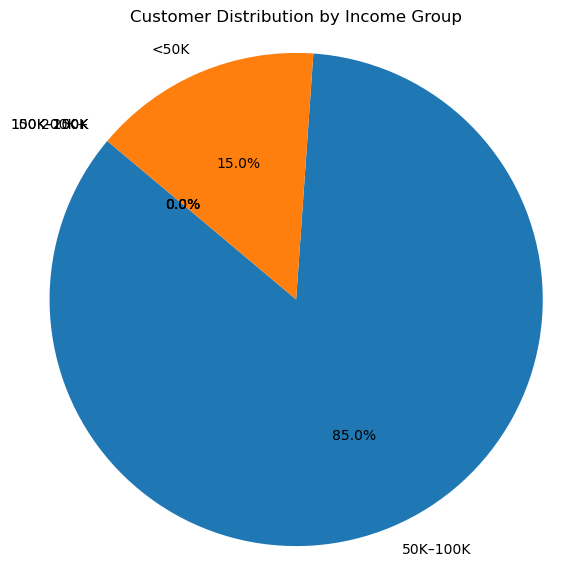

In [2329]:
# Create income groups
df['income_group'] = pd.cut(df['annual_salary'], 
                            bins=[0, 50000, 100000, 150000, 200000, float('inf')], 
                            labels=['<50K', '50K–100K', '100K–150K', '150K–200K', '200K+'])

# Count of each income group
income_counts = df['income_group'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Distribution by Income Group')
plt.axis('equal')
plt.show()

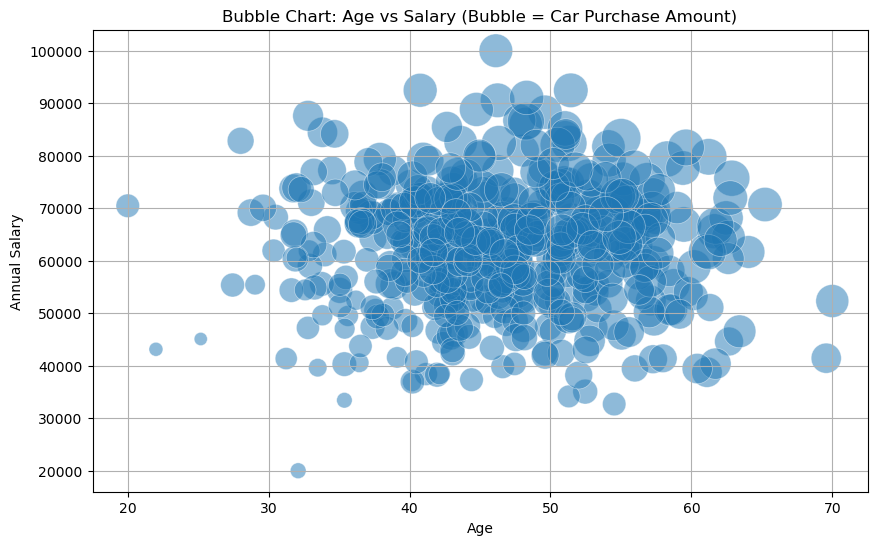

In [2330]:
# Bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['annual_salary'], 
            s=df['car_purchase_amount'] / 100,  # scale bubble size
            alpha=0.5, edgecolors='w', linewidth=0.5)

plt.xlabel("Age")
plt.ylabel("Annual Salary")
plt.title("Bubble Chart: Age vs Salary (Bubble = Car Purchase Amount)")
plt.grid(True)
plt.show()


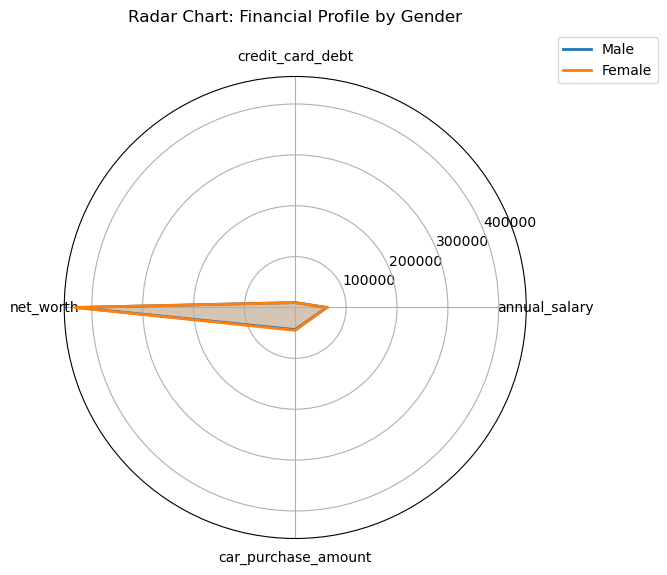

In [2331]:
# Select relevant numeric features and group by gender
features = ['annual_salary', 'credit_card_debt', 'net_worth', 'car_purchase_amount']
grouped = df.groupby('gender')[features].mean()

# Radar chart settings
labels = features
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete loop

# Prepare data for both genders
male_data = grouped.loc['Male'].tolist()
female_data = grouped.loc['Female'].tolist()
male_data += male_data[:1]
female_data += female_data[:1]

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

ax.plot(angles, male_data, label='Male', linewidth=2)
ax.fill(angles, male_data, alpha=0.25)

ax.plot(angles, female_data, label='Female', linewidth=2)
ax.fill(angles, female_data, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title("Radar Chart: Financial Profile by Gender", y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


C:\Users\rimjh\AppData\Local\Temp\ipykernel_7700\3201779205.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pyramid_data = df.groupby(['age_group', 'gender']).size().unstack().fillna(0)


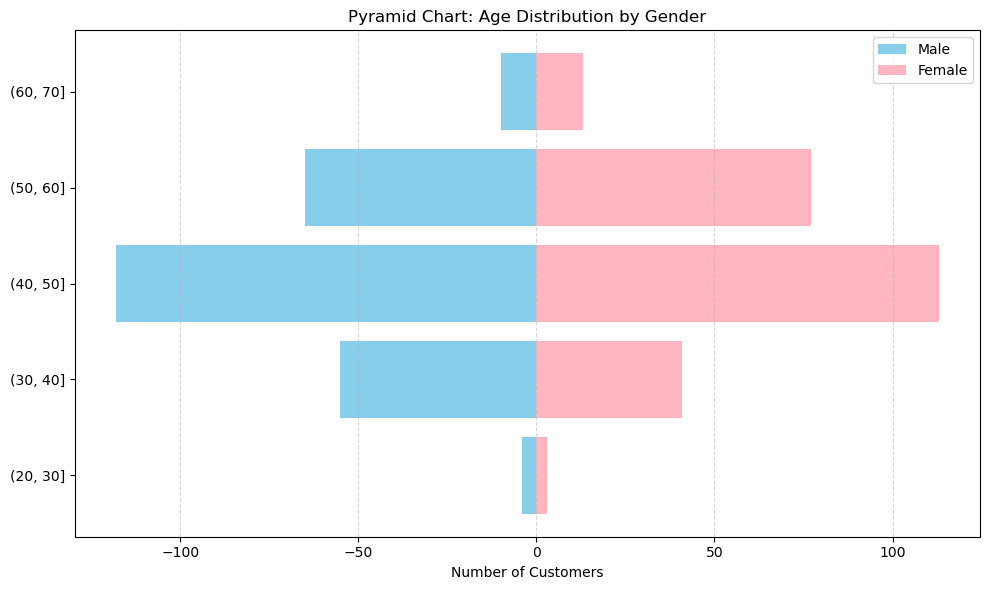

In [2332]:
# Create age bins
age_bins = [20, 30, 40, 50, 60, 70]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# Group by gender and age group
pyramid_data = df.groupby(['age_group', 'gender']).size().unstack().fillna(0)

# Make male counts negative for pyramid
pyramid_data['Male'] = -pyramid_data['Male']

# Plot the pyramid chart
plt.figure(figsize=(10, 6))
plt.barh(pyramid_data.index.astype(str), pyramid_data['Male'], color='skyblue', label='Male')
plt.barh(pyramid_data.index.astype(str), pyramid_data['Female'], color='lightpink', label='Female')

plt.xlabel("Number of Customers")
plt.title("Pyramid Chart: Age Distribution by Gender")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


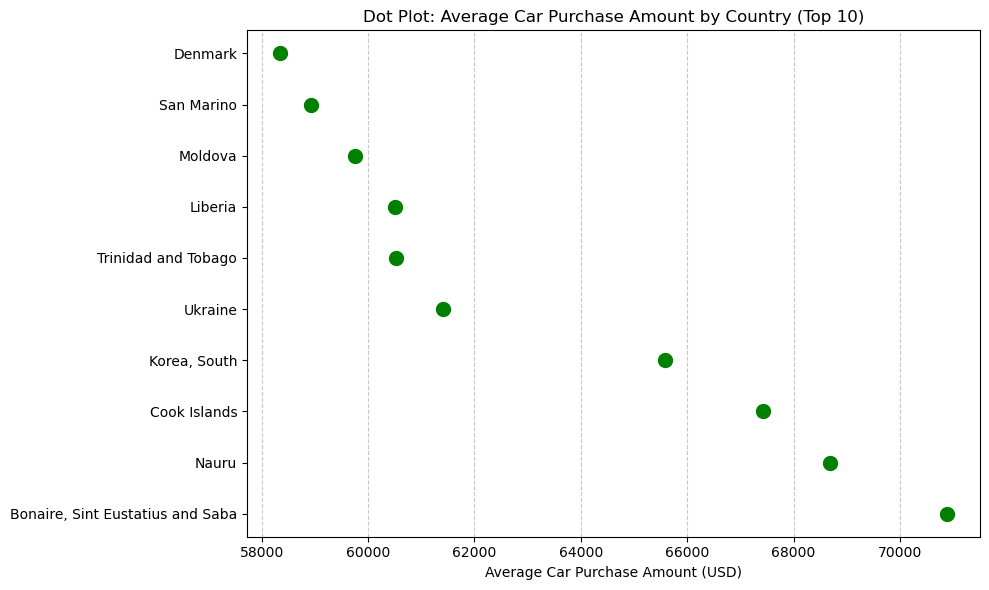

In [2333]:
# Calculate average car purchase amount by country (top 10 only for clarity)
country_avg = df.groupby('country')['car_purchase_amount'].mean().sort_values(ascending=False).head(10)

# Plot as a dot plot
plt.figure(figsize=(10, 6))
plt.plot(country_avg.values, country_avg.index, 'o', markersize=10, color='green')

plt.title("Dot Plot: Average Car Purchase Amount by Country (Top 10)")
plt.xlabel("Average Car Purchase Amount (USD)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


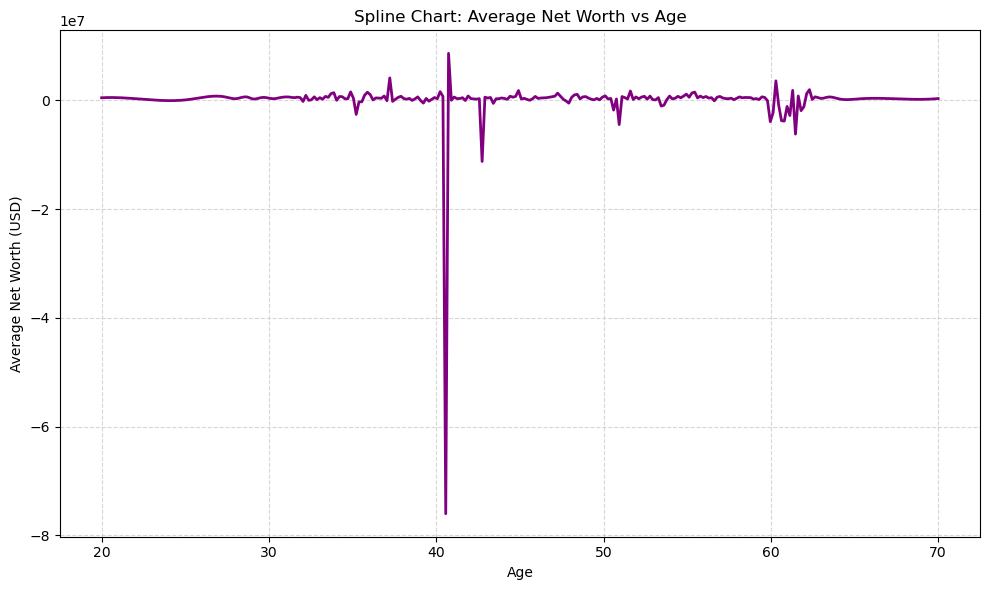

In [2334]:
# Sort data by age and group by age to get average net worth
age_networth = df.groupby('age')['net_worth'].mean().reset_index()

# Sort for plotting
age_networth = age_networth.sort_values(by='age')

# Create smooth spline curve
x = age_networth['age']
y = age_networth['net_worth']

# Interpolate for smoothing
x_new = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, y, k=3)
y_smooth = spline(x_new)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_smooth, color='purple', linewidth=2)
plt.title("Spline Chart: Average Net Worth vs Age")
plt.xlabel("Age")
plt.ylabel("Average Net Worth (USD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\rimjh\AppData\Local\Temp\ipykernel_7700\3974353669.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_total = df.groupby('age_group')['car_purchase_amount'].sum().reset_index()


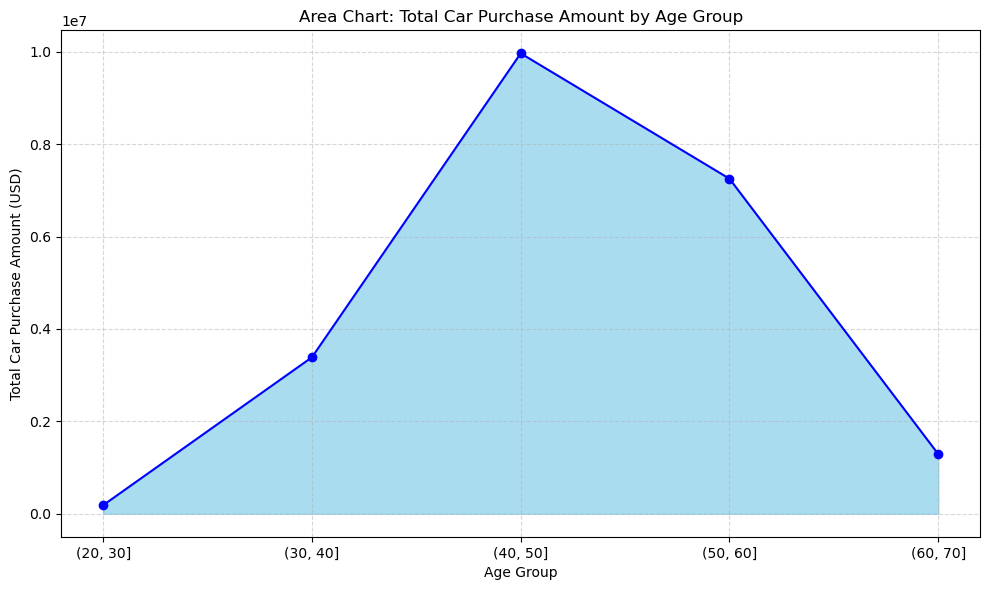

In [2335]:
# Create age bins for grouping
age_bins = [20, 30, 40, 50, 60, 70]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

# Group by age group and sum car purchase amounts
age_group_total = df.groupby('age_group')['car_purchase_amount'].sum().reset_index()

# Plot Area Chart
plt.figure(figsize=(10, 6))
plt.fill_between(age_group_total['age_group'].astype(str), age_group_total['car_purchase_amount'],
                 color='skyblue', alpha=0.7)

plt.plot(age_group_total['age_group'].astype(str), age_group_total['car_purchase_amount'],
         color='blue', marker='o')

plt.title("Area Chart: Total Car Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Car Purchase Amount (USD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()